In this notebook, we use 1D linear regression (without intercept term) to demonstrate the regularization and the model complexity. 



In [64]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [95]:
theta_true = np.array([0, 3.0])

In [96]:
def generateData(theta, noise=True):
    xs = np.linspace(0, 10, 50)
    ys = np.polynomial.polynomial.polyval(xs, theta) 
    
    if noise:
        epsilon = [np.random.normal(scale=2) for y in ys]
        ys += epsilon
    return xs, ys

In [97]:
xs, ys = generateData(theta_true, noise=False)

Plot the data generated by the true paramater, and data generated by introducing noises.

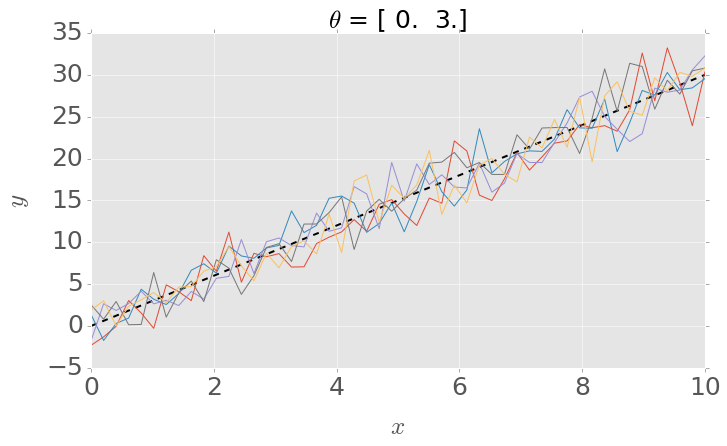

In [139]:
FONTSIZE = 25
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11, 6))
_, = ax.plot(xs, ys, color='k', linestyle='--', lw=2)
for k in range(5):
    _, tmp_ys = generateData(theta_true, noise=True)
    _, = ax.plot(xs, tmp_ys)
ax.set_xlabel(r'$x$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel(r'$y$', fontsize=FONTSIZE, labelpad=15)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
    tick.label.set_rotation(0)
title = ax.set_title(r'$\theta$ = {0:}'.format(true_theta), fontsize=FONTSIZE)


In [98]:
def generate_theta_estimates(alpha, repeat=100):
    theta_estimates = []
    for k in range(repeat):
        xs, ys = generateData(theta_true)
        lg = linear_model.Ridge(alpha=alpha)
        lg.fit(pd.DataFrame(xs), np.array(ys))
        theta_estimates.append(lg.coef_[0])
    return theta_estimates

The procedure goes as follows:


For alpha in candidate_alphas:

    estimates = []    
    For k in 1:100   
        D = generateData(true_theta, noise)        
        theta = LinearRegression(D)        
        estimates.append(theta)
        
    Given the estimates, compute the bias, variance, and MSE
        

In [113]:
alphas = np.append(alphas, np.power(2, np.arange(15)))

bias2_values = []
variance_values = []
MSE_values = []

for a in alphas:
    # fit parameter
    theta_estimates = generate_theta_estimates(a)
    
    # compute bias^2, variance, and MSE
    theta_bar = np.mean(theta_estimates)
    bias2 = np.power(theta_bar - theta_true[1], 2.0)
    var_theta = np.var(theta_estimates)
    # the above is equivalent to: np.sum(np.power(theta_estimates - theta_bar, 2))/(len(theta_estimates))
    mse = np.mean(np.power(theta_estimates  - theta_true[1], 2))
    
    bias2_values.append(bias2)
    variance_values.append(var_theta)
    MSE_values.append(mse)
    


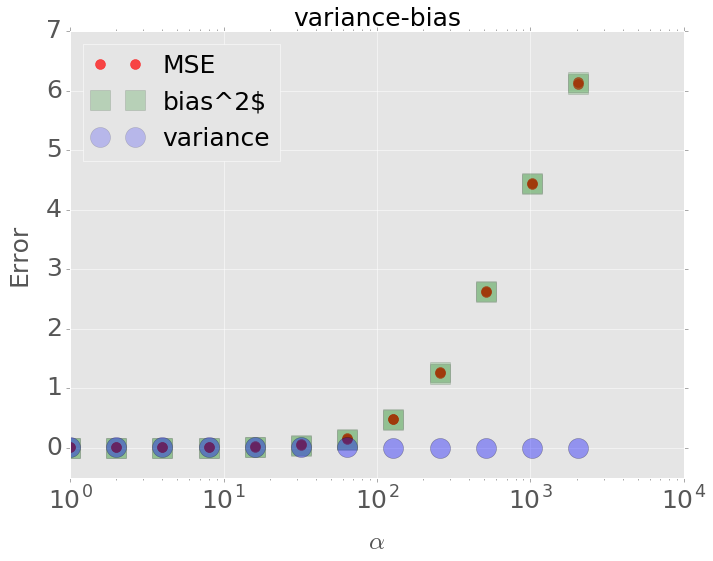

In [141]:
FONTSIZE = 25
plt.close('all')
fig, ax = plt.subplots(1, figsize=(11, 8))

p_mse, = ax.plot(alphas, MSE_values, color='r', lw=0, marker='.', markersize=20, alpha=0.7)
p_bias2, = ax.plot(alphas, bias2_values, color='g', lw=0, marker='s', markersize=20, alpha=0.2)
p_variance, = ax.plot(alphas, variance_values, color='b', lw=0, marker='o', markersize=20, alpha=0.2)

ax.set_xscale("log", nonposx='clip')
ax.set_xlabel(r'$\alpha$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel('Error', fontsize=FONTSIZE, labelpad=15)
ax.set_xlim(-0.5)
ax.set_ylim(-0.5)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(FONTSIZE)
l = plt.legend((p_mse, p_bias2, p_variance), ('MSE', 'bias^2$', 'variance'), fontsize=FONTSIZE, loc=2)
t = ax.set_title('variance-bias', fontsize=FONTSIZE)

